<a href="https://colab.research.google.com/github/uwerrrr/mySQL-analytics/blob/main/plotting_exported_views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**mySQL-analytics**

**Plotting exported views from mySQL**

**Done by Oscar NGUYEN**




## Preparing data

Import csv files containgin VIEWS exported from mySQL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
cd 'drive/MyDrive/Colab Notebooks/data/mySQL-analytics/'

/content/drive/MyDrive/Colab Notebooks/data/mySQL-analytics


In [4]:
total_rev_per_country = pd.read_csv('./total_rev_per_country.csv', names = ['CountryName', 'TotalRevenue'])
monthly_rev_trend = pd.read_csv('./monthly_rev_trend.csv', names = ['Month', 'MonthlyRevenue'])
invoice_totals = pd.read_csv('./invoice_totals.csv', names = ['InvoiceID', 'InvoiceTotal'])
avg_invoice_amount = pd.read_csv('./avg_invoice_amount.csv', names = ['AverageInvoiceAmount'])


In [5]:
total_rev_per_country.head(5)

,CountryName,TotalRevenue
0,United Kingdom\r,3.974986e+08
1,Germany\r,1.556358e+07
2,France\r,1.144496e+07
3,Belgium\r,3.932064e+06
4,Spain\r,2.985751e+06


In [6]:
monthly_rev_trend.head(5)

,Month,MonthlyRevenue
0,2010-12,24772835.52
1,2011-01,5895172.84
2,2011-02,-13435794.57
3,2011-03,-22180349.14
4,2011-04,12370016.69


In [7]:
invoice_totals.head(5)

,InvoiceID,InvoiceTotal
0,1,974.68
1,156,529.82
2,187,18474.56
3,235,2753.71
4,442,70159.76


In [8]:
avg_invoice_amount.head(5)

,AverageInvoiceAmount
0,17580.712889


In [9]:
# Transform avg amount to a numberic variable
avg_invoice_amount = avg_invoice_amount['AverageInvoiceAmount'].item()
avg_invoice_amount

17580.712889

Data cleaning

In [10]:
total_rev_per_country['CountryName'] = total_rev_per_country['CountryName'].str.strip()

## Plotting

###Total revenue per country

**Bar chart**

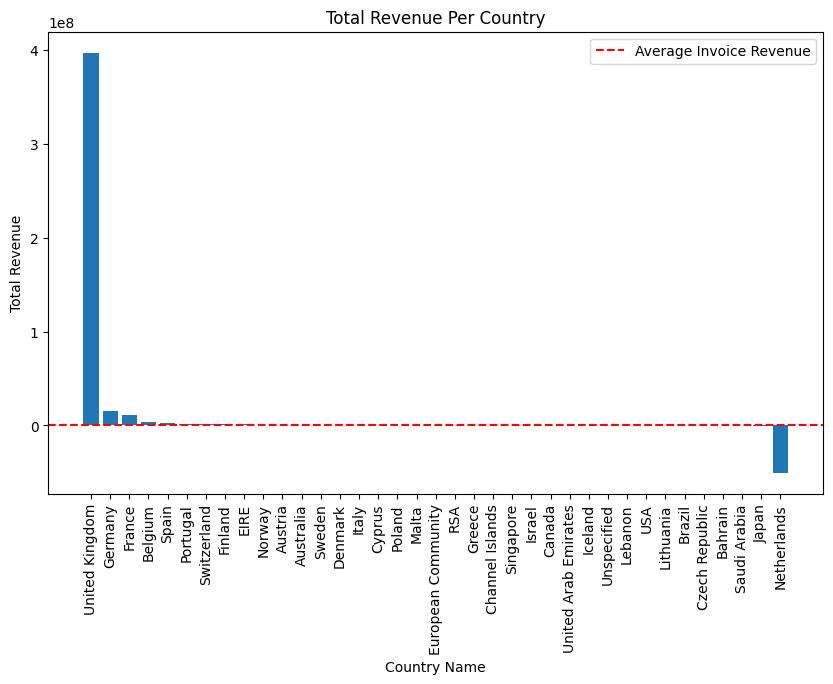

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(total_rev_per_country['CountryName'], total_rev_per_country['TotalRevenue'])
plt.xlabel('Country Name')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Per Country')
plt.xticks(rotation=90)

plt.axhline(avg_invoice_amount, color='red', linestyle='--', label='Average Invoice Revenue')
plt.legend()

plt.show()


**The difference between contries' total revenue is too big. A log transformation is applied for it to be easier to see the trend.**

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


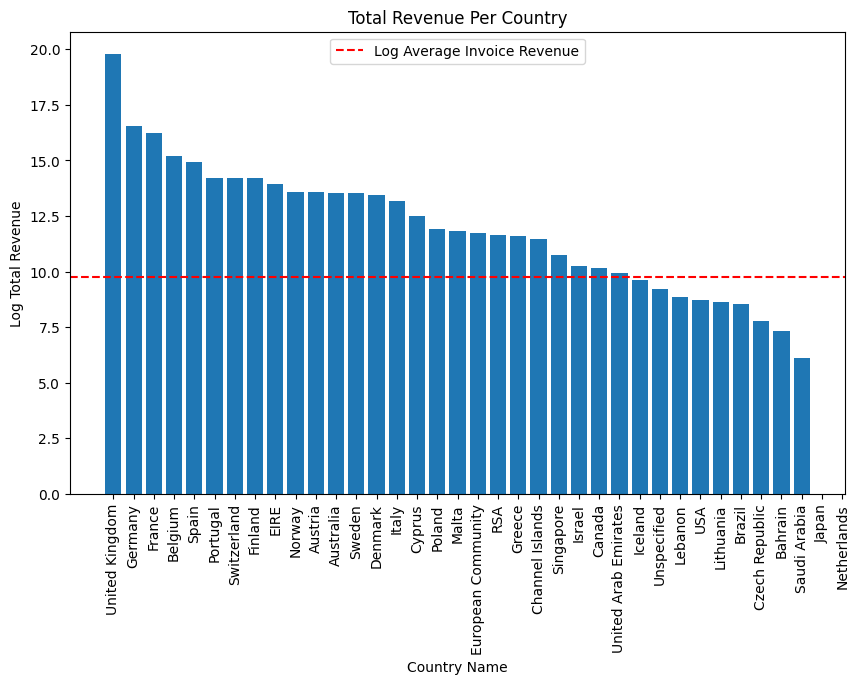

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(total_rev_per_country['CountryName'], np.log(total_rev_per_country['TotalRevenue']))
plt.xlabel('Country Name')
plt.ylabel('Log Total Revenue')
plt.title('Total Revenue Per Country')
plt.xticks(rotation=90)

plt.axhline(np.log(avg_invoice_amount), color='red', linestyle='--', label='Log Average Invoice Revenue')
plt.legend()


plt.show()


**Biggest revenues come from customers from UK, Germany, France and Belgium. While Japan and Nertherlands are only 2 contries that observe negative revenues**

### Monthly Revenue Trend

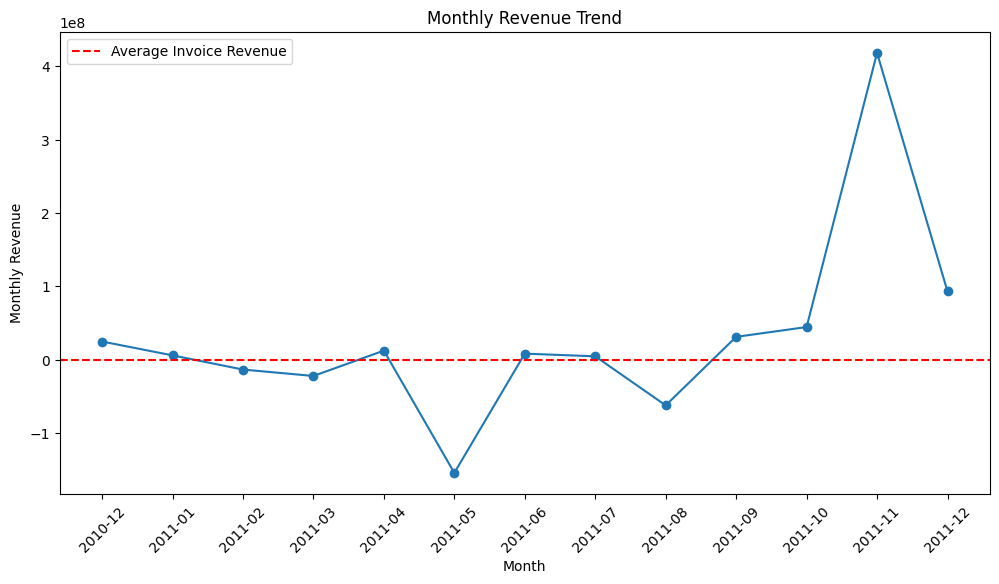

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_rev_trend['Month'], monthly_rev_trend['MonthlyRevenue'], marker='o')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)

plt.axhline(avg_invoice_amount, color='red', linestyle='--', label='Average Invoice Revenue')
plt.legend()

plt.show()

**From Dec 2010 to Dec 2011:**

**The peak of revenue is shown in November, which is the month before Christmas.**

**Meanwhile, May oabserved largest negative revenue, which means that there were a lot of returns during that time**

### Invoice Amount Distribution

**Boxplot**

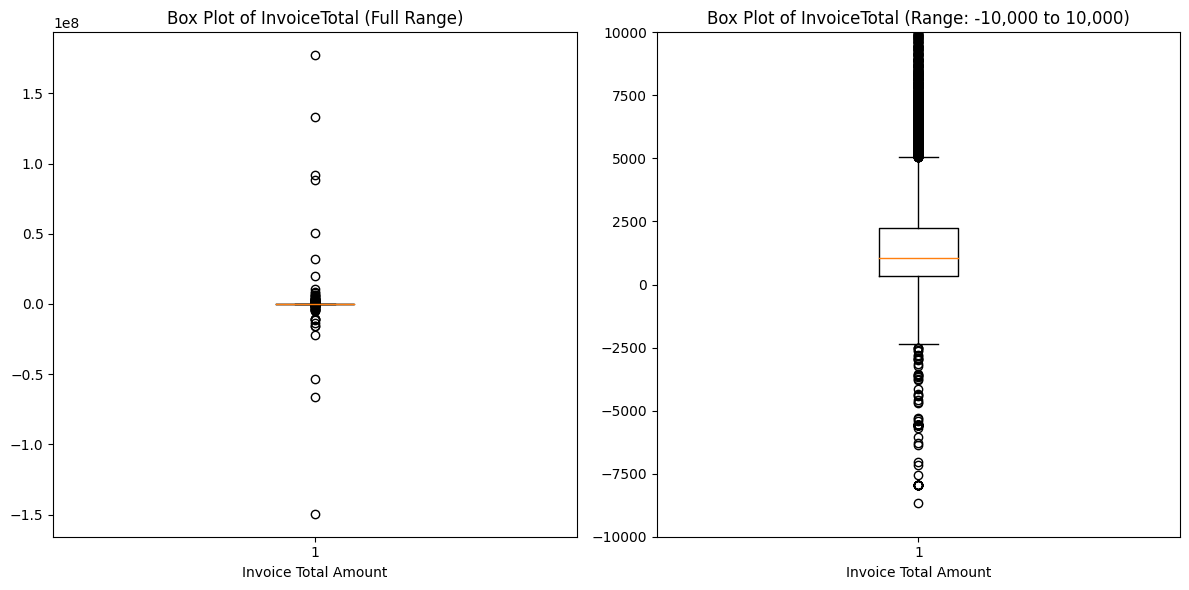

In [22]:
min = -10000
max = 10000

# Create a 1x2 grid for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first boxplot (with limit)
axes[0].boxplot(invoice_totals['InvoiceTotal'])
axes[0].set_title('Box Plot of InvoiceTotal (Full Range)')
axes[0].set_xlabel('Invoice Total Amount')

# Plot the second boxplot
axes[1].boxplot(invoice_totals['InvoiceTotal'])
axes[1].set_ylim(min, max)
axes[1].set_title('Box Plot of InvoiceTotal (Range: -10,000 to 10,000)')
axes[1].set_xlabel('Invoice Total Amount')

plt.tight_layout()
plt.show()

**Histogram**

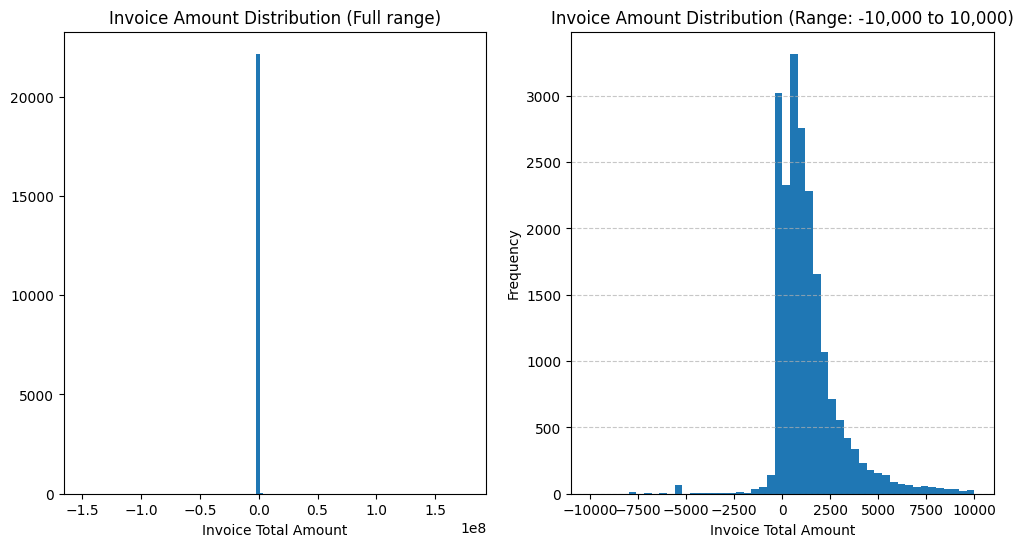

In [28]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


bins = 100
axes[0].hist(invoice_totals['InvoiceTotal'], bins=bins)
axes[0].set_title(f'Invoice Amount Distribution (Full range)')
axes[0].set_xlabel('Invoice Total Amount')



axes[1].hist(invoice_totals['InvoiceTotal'], bins=50, range=(-10000, 10000))
axes[1].set_xlabel('Invoice Total Amount')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Invoice Amount Distribution (Range: -10,000 to 10,000)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Display the figures
plt.show()


**In the dataset, there are a lot of abnormal large dollar value invoices (in both positive and negative). However, when looking at invoice values within the range of -10,000 to 10,000, most invoices have values around 0 and 2,500.**